In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("c://hotel_reviews1.csv")
df.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


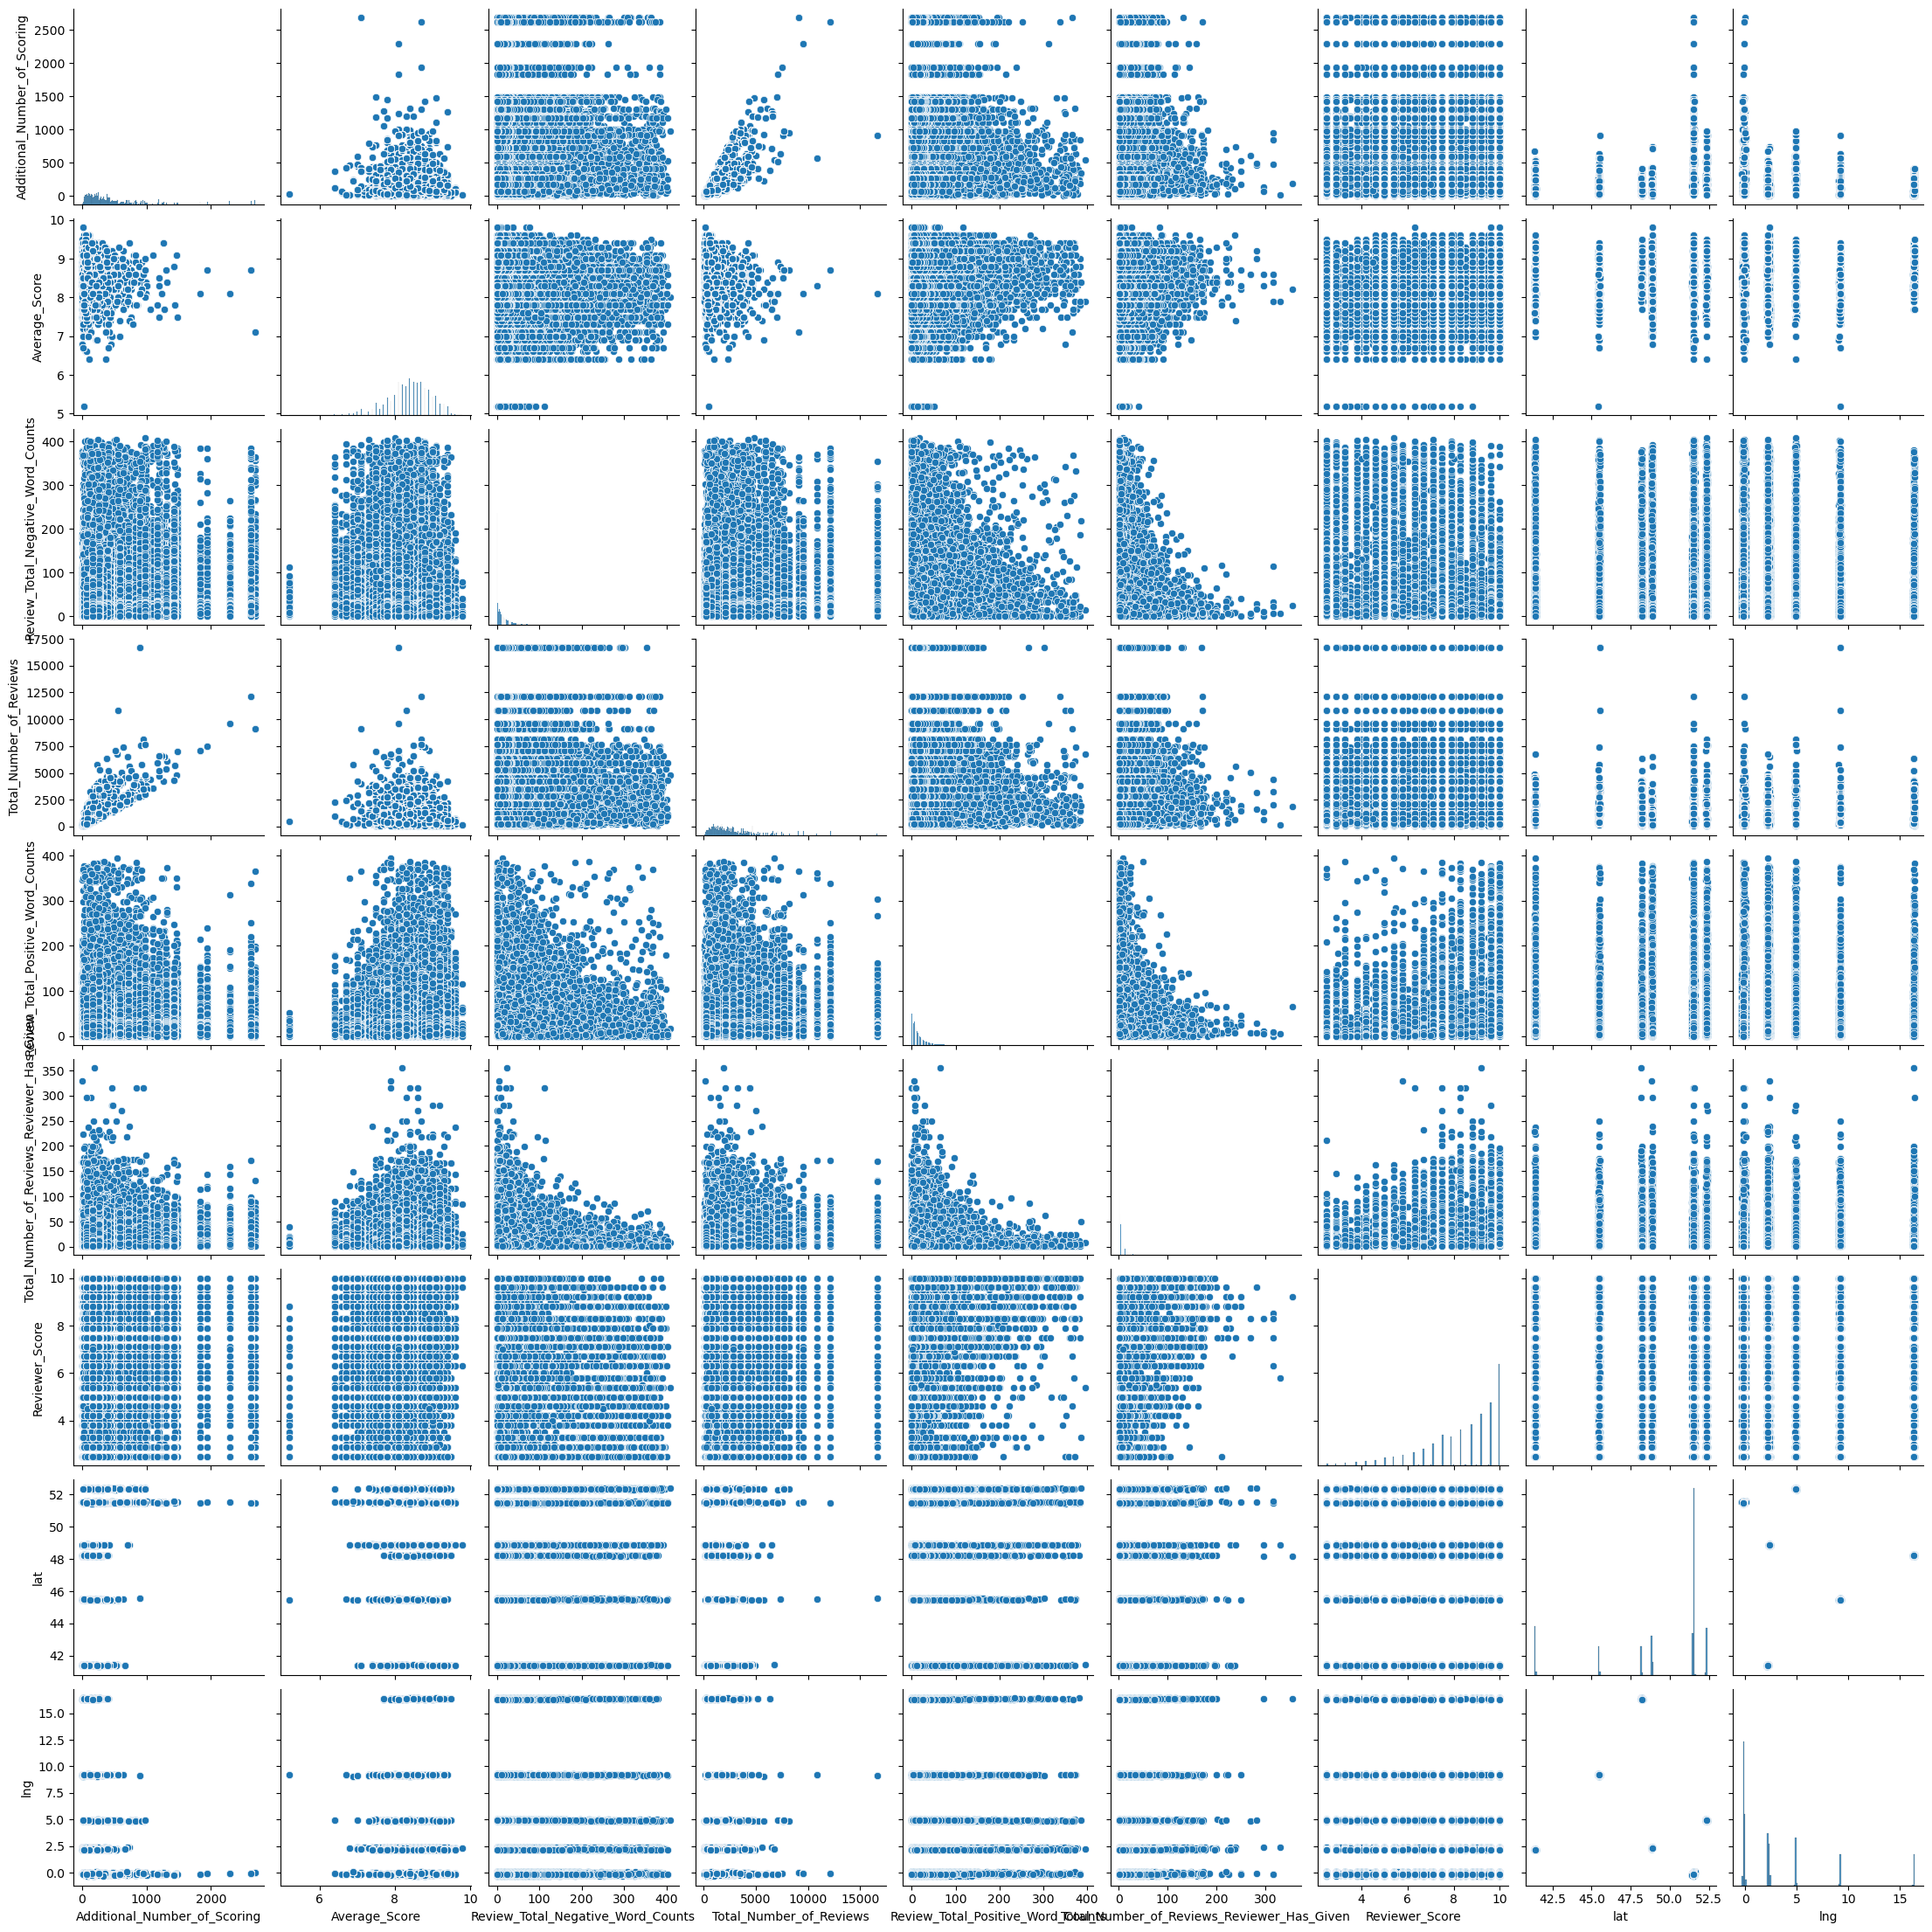

In [3]:
sns.pairplot(df)

In [2]:
df.select_dtypes(include='object').columns

Index(['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review'],
      dtype='object')

<Axes: title={'center': 'Hotel distribution in European countries'}, ylabel='EC'>

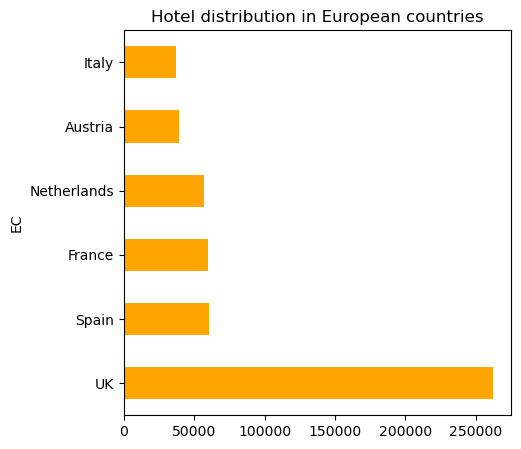

In [49]:
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')
df['EC'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1]) 
plt.figure(figsize = (5,5))
plt.title('Hotel distribution in European countries')
df.EC.value_counts().plot.barh(color = 'orange')

<Axes: xlabel='Average_Score', ylabel='count'>

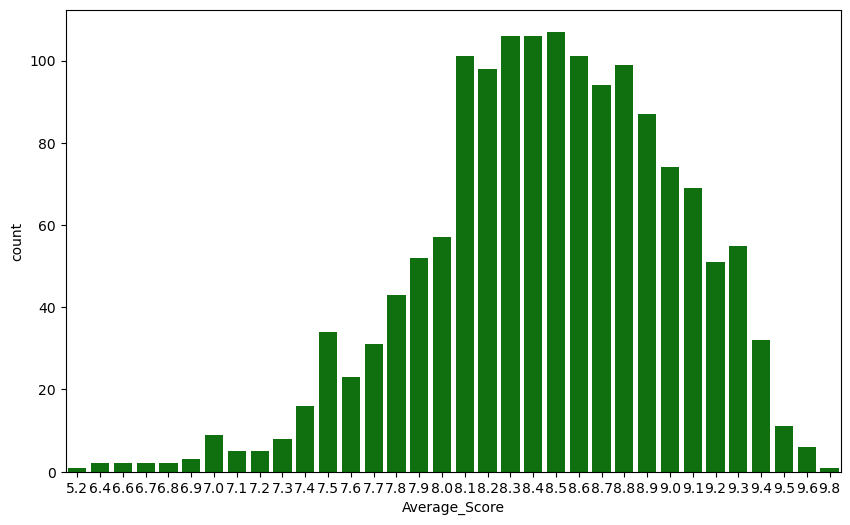

In [3]:
df_sd = df[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates
plt.figure(figsize = (10,6))
sns.countplot(x = 'Average_Score',data = df_sd,color = 'green')


In [26]:
from nltk.probability import FreqDist
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.lineplot(data=d, x= "word", y = "count",color='red')
  ax.set(ylabel = 'Count')
  plt.show()

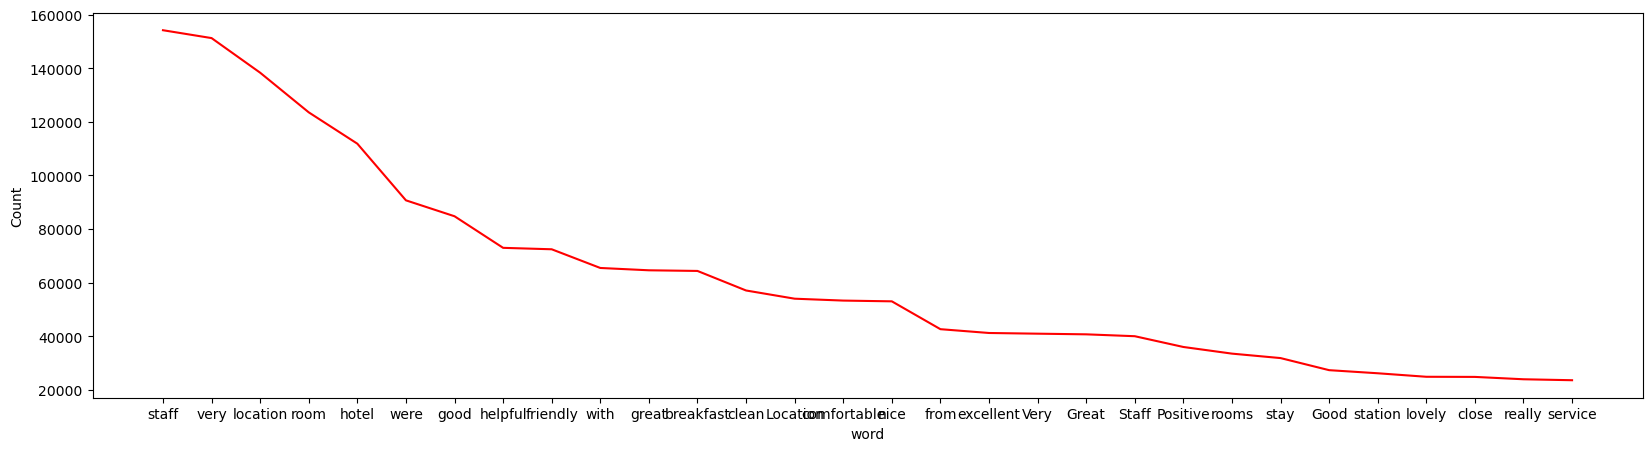

In [27]:
freq_words(df['Positive_Review'])

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new
# I would apply everyting below to both positive and negative reviews
# remove short words (length < 4)
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


# remove stopwords from the text
reviews_1 = [remove_stopwords(r.split()) for r in df['Positive_Review']]
reviews_2 = [remove_stopwords(r.split()) for r in df['Negative_Review']]



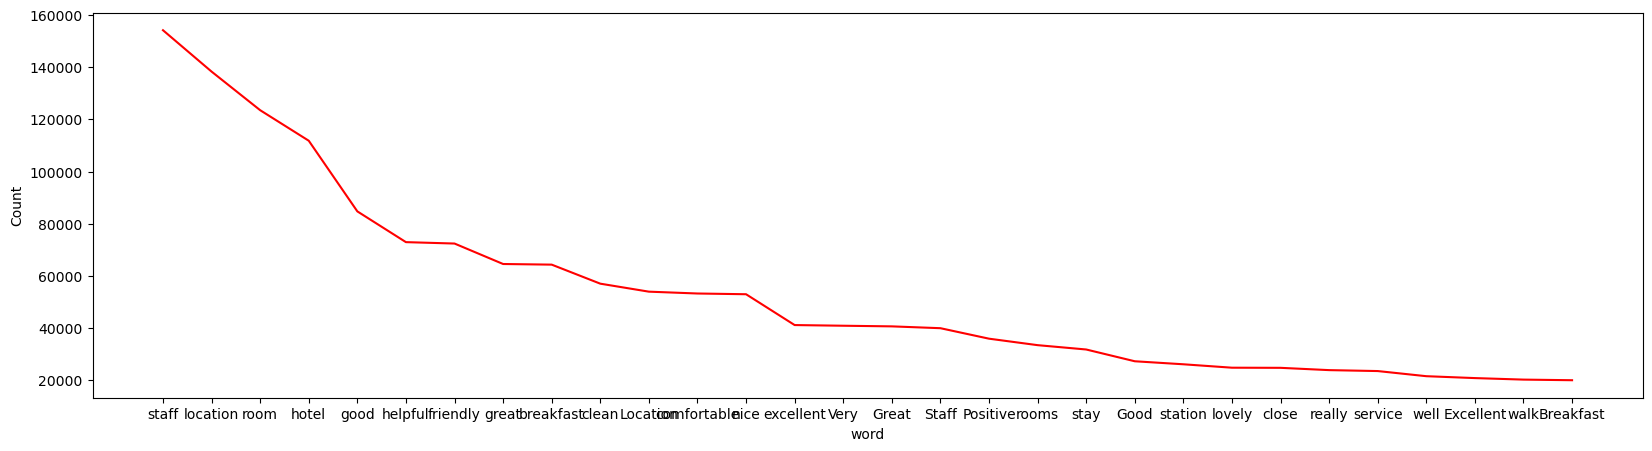

In [28]:
freq_words(reviews_1, 30)

Positive reviews


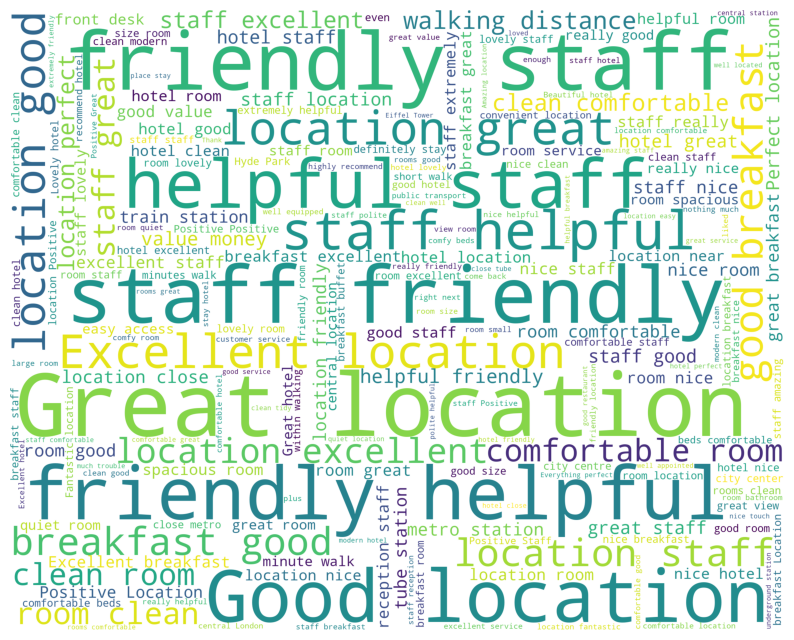

Negative reviews


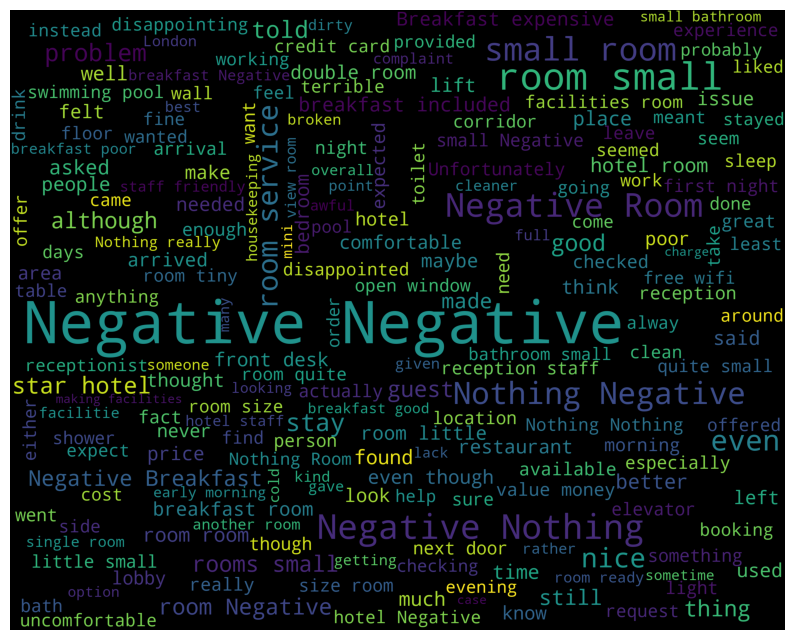

In [50]:
from wordcloud import WordCloud,STOPWORDS
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive reviews")
wordcloud_draw(reviews_1,'white')
print("Negative reviews")
wordcloud_draw(reviews_2)


<Axes: ylabel='Additional_Number_of_Scoring'>

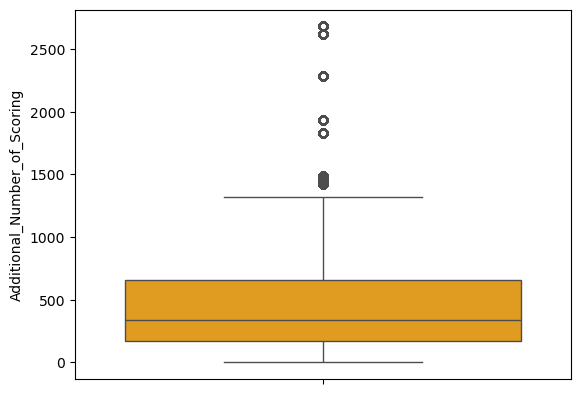

In [51]:
sns.boxplot(df["Additional_Number_of_Scoring"],color="orange")

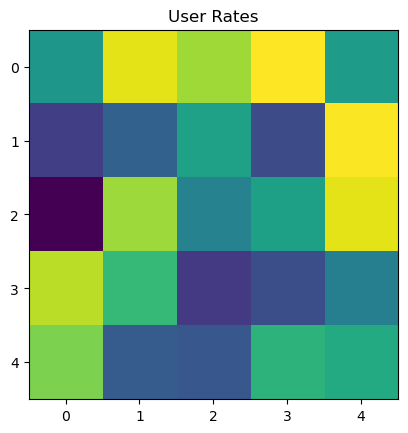

In [7]:
import numpy as np
import matplotlib.pyplot as plt
rates=np.random.random((5,5))
plt.imshow(rates)
plt.title("User Rates")
plt.show()

<Axes: xlabel='Review_Total_Negative_Word_Counts'>

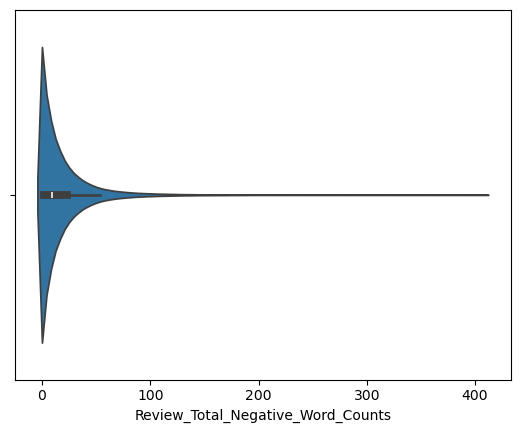

In [10]:
sns.violinplot(x=df["Review_Total_Negative_Word_Counts"],data=df)

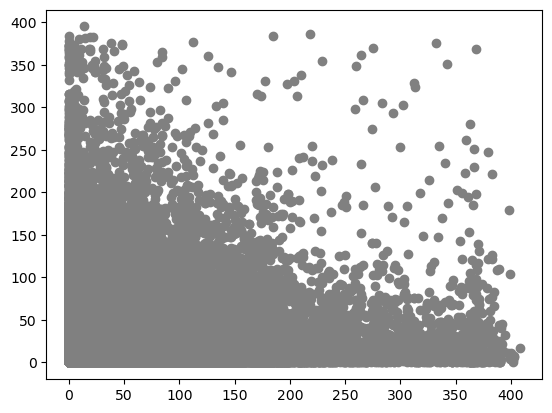

In [15]:
plt.scatter(df["Review_Total_Negative_Word_Counts"],y=df["Review_Total_Positive_Word_Counts"],color="gray")